In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *

import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [31]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

default = 2 represent the loan got defaulted. We take this a postive event. 

In [4]:
target = "default"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
# Label encoder convert the categorical value 
# in the target variable with index
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", linear_model.LogisticRegression())
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [5]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
result["match"] = result.actual == result.prediction
result.head()

,actual,prediction,match
0,1,0,False
1,0,1,False
2,0,0,True
3,1,1,True
4,1,1,True


In [6]:
result.match.value_counts() / len(result)

True     0.756667
False    0.243333
Name: match, dtype: float64

In [7]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10843f438>)

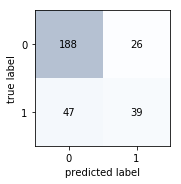

In [8]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ce7eeb8>)

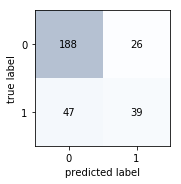

In [9]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1cee3630>)

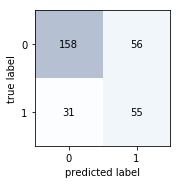

In [10]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1cf26b00>)

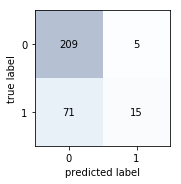

In [11]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

train accuracy: 0.7957142857142857
test accuracy: 0.7466666666666667
train precision: 0.6961325966850829
test precision: 0.75
train recall: 0.5887850467289719
test recall: 0.1744186046511628


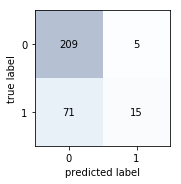

In [12]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))


test auc: 0.758476418169963


Text(0.5,1,'ROC, auc: 0.758476418169963')

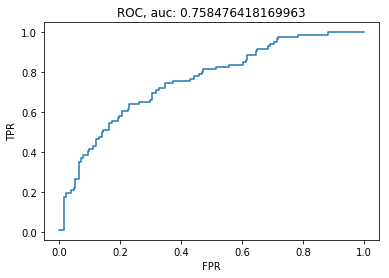

In [13]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
print("test auc:", metrics.auc(fpr, tpr))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str(metrics.auc(fpr, tpr)))


In [16]:
est = pipe.steps[-1][-1]

In [21]:
est.coef_.shape

(1, 48)

In [27]:
summary = pd.DataFrame({"feature": X_dummy.columns
                    , "coefficient": est.coef_[0]})
summary.iloc[np.abs(summary.coefficient)\
             .sort_values(ascending = False).index, :]


,feature,coefficient
13,credit_history_repaid,0.732506
9,checking_balance_unknown,-0.574947
2,installment_rate,0.490867
33,personal_status_single male,-0.479044
1,amount,0.445245
...,...,...
36,property_other,-0.033038
27,employment_length_1 - 4 yrs,-0.032864
30,employment_length_unemployed,0.025342
16,purpose_domestic appliances,0.012740


In [ ]:
pd.Series()

train accuracy: 0.7514285714285714
test accuracy: 0.7133333333333334
train precision: 0.6470588235294118
test precision: 0.0
train recall: 0.411214953271028
test recall: 0.0


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


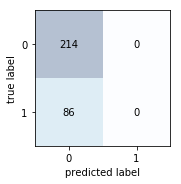

In [32]:
target = "default"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
# Label encoder convert the categorical value 
# in the target variable with index
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))
